Initial Centroids:
C1: [3 3]
C2: [3 7]
C3: [9 4]

--- Iteration 1 ---
P1 -> C1 (distance: 2.00)
P2 -> C1 (distance: 1.41)
P3 -> C2 (distance: 2.24)
P4 -> C3 (distance: 1.41)
P5 -> C2 (distance: 2.00)
P6 -> C3 (distance: 3.16)
P7 -> C1 (distance: 0.00)
P8 -> C3 (distance: 0.00)
P9 -> C2 (distance: 0.00)
New C1: [2.         2.66666667]
New C2: [3.66666667 8.        ]
New C3: [9.         5.33333333]

--- Iteration 2 ---
P1 -> C1 (distance: 1.05)
P2 -> C1 (distance: 0.67)
P3 -> C2 (distance: 1.33)
P4 -> C3 (distance: 1.05)
P5 -> C2 (distance: 1.20)
P6 -> C3 (distance: 1.94)
P7 -> C1 (distance: 1.05)
P8 -> C3 (distance: 1.33)
P9 -> C2 (distance: 1.20)
New C1: [2.         2.66666667]
New C2: [3.66666667 8.        ]
New C3: [9.         5.33333333]


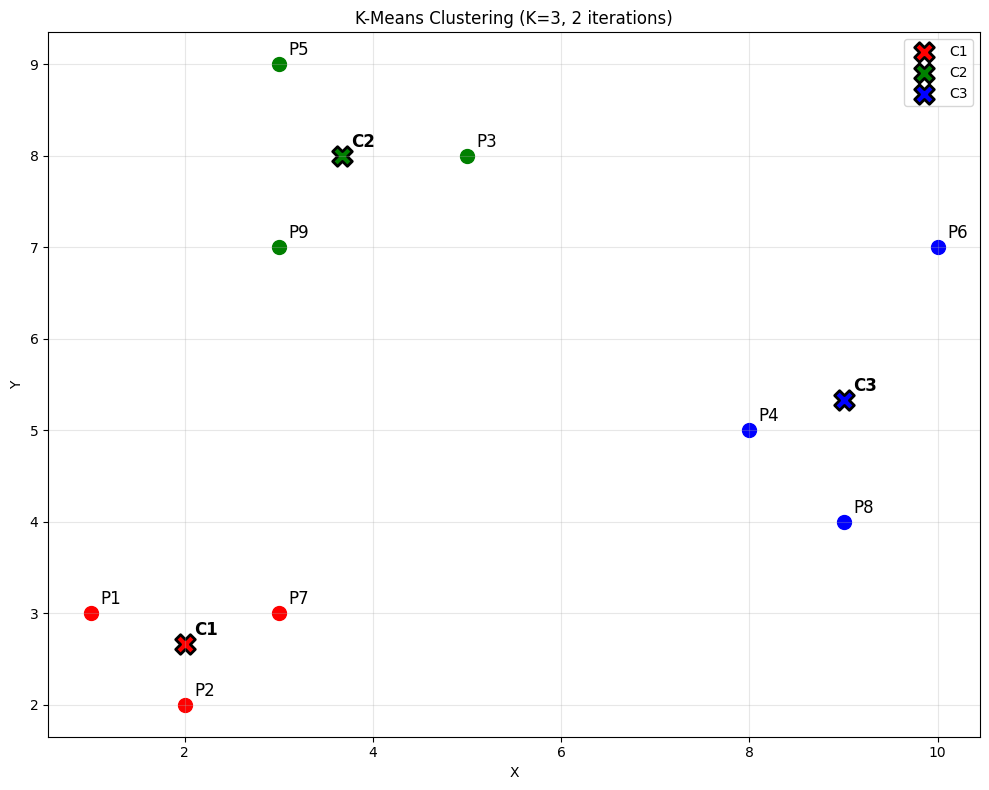

In [4]:
import numpy as np
import matplotlib.pyplot as plt
points = {
    'P1': (1, 3), 'P2': (2, 2), 'P3': (5, 8),
    'P4': (8, 5), 'P5': (3, 9), 'P6': (10, 7),
    'P7': (3, 3), 'P8': (9, 4), 'P9': (3, 7)
}
centroids = {
    'C1': np.array([3, 3]), 
    'C2': np.array([3, 7]),  
    'C3': np.array([9, 4])   
}
print("Initial Centroids:")
for c_name, c_coord in centroids.items():
    print(f"{c_name}: {c_coord}")
for iteration in range(2):
    print(f"\n--- Iteration {iteration + 1} ---")
    assignments = {}
    for p_name, p_coord in points.items():
        p_coord_np = np.array(p_coord)
        distances = []
        for c_name, c_coord in centroids.items():
            dist = np.sqrt((p_coord_np[0] - c_coord[0])**2 + (p_coord_np[1] - c_coord[1])**2)
            distances.append((dist, c_name))
        closest = min(distances, key=lambda x: x[0])
        assignments[p_name] = closest[1]
        print(f"{p_name} -> {closest[1]} (distance: {closest[0]:.2f})")
    for c_name in centroids.keys():
        cluster_points = []
        for p_name, p_coord in points.items():
            if assignments[p_name] == c_name:
                cluster_points.append(np.array(p_coord))
        if cluster_points:
            new_centroid = np.mean(cluster_points, axis=0)
            centroids[c_name] = new_centroid
            print(f"New {c_name}: {new_centroid}")
plt.figure(figsize=(10, 8))
plt.title("K-Means Clustering (K=3, 2 iterations)")
colors = {'C1': 'red', 'C2': 'green', 'C3': 'blue'}
for p_name, p_coord in points.items():
    p_coord_np = np.array(p_coord)
    distances = []
    for c_name, c_coord in centroids.items():
        dist = np.sqrt((p_coord_np[0] - c_coord[0])**2 + (p_coord_np[1] - c_coord[1])**2)
        distances.append((dist, c_name))
    closest_cluster = min(distances, key=lambda x: x[0])[1]
    plt.scatter(p_coord[0], p_coord[1], color=colors[closest_cluster], s=100)
    plt.text(p_coord[0] + 0.1, p_coord[1] + 0.1, p_name, fontsize=12)
for c_name, c_coord in centroids.items():
    plt.scatter(c_coord[0], c_coord[1], color=colors[c_name], s=200, 
                marker='X', label=c_name, edgecolors='black', linewidth=2)
    plt.text(c_coord[0] + 0.1, c_coord[1] + 0.1, c_name, 
             fontsize=12, fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()